In [100]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

import pandas as pd
from pandas_profiling import ProfileReport
import statistics
import seaborn as sns
from sklearn import set_config
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, RidgeCV, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import (r2_score,
                             mean_squared_error,
                             mean_absolute_percentage_error,
                             median_absolute_error,
                             max_error, make_scorer
                            )
from sklearn.metrics import PredictionErrorDisplay
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate,cross_val_score,validation_curve,learning_curve
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.feature_selection import SelectKBest, f_classif,chi2
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, OrdinalEncoder

set_config(display="diagram", print_changed_only=False)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [101]:
df = pd.read_csv("C:/Users/DELL/Desktop/ISE 2/Machine Learning/train.csv")

# I Nettoyage des données ( Taitement de valeurs manquantes et Imputation)

In [102]:
# FireplaceQu : data description says NA means "no fireplace"
df.loc[:, "FireplaceQu"] =  df.loc[:, "FireplaceQu"].fillna("No")

# LotFrontage : NA most likely means no lot frontage
df.loc[:, "LotFrontage"] =  df.loc[:, "LotFrontage"].fillna(0)

# GarageType etc : data description says NA for garage features is "no garage" 
df.loc[:, "GarageType"] =  df.loc[:, "GarageType"].fillna("No")
df.loc[:, "GarageFinish"] =  df.loc[:, "GarageFinish"].fillna("No")
df.loc[:, "GarageQual"] =  df.loc[:, "GarageQual"].fillna("No")
df.loc[:, "GarageCond"] =  df.loc[:, "GarageCond"].fillna("No") 
df.loc[:, "GarageYrBlt"] =  df.loc[:, "GarageYrBlt"].fillna(0)

# BsmtQual etc : data description says NA for basement features is "no basement" and error for id 333 and 949
df.loc[333, "BsmtFinType2"] ="Unf"
df.loc[949, "BsmtExposure"] ="Av"
df.loc[:, "BsmtQual"] =  df.loc[:, "BsmtQual"].fillna("No")
df.loc[:, "BsmtCond"] =  df.loc[:, "BsmtCond"].fillna("No")
df.loc[:, "BsmtExposure"] =  df.loc[:, "BsmtExposure"].fillna("No")
df.loc[:, "BsmtFinType1"] =  df.loc[:, "BsmtFinType1"].fillna("No")
df.loc[:, "BsmtFinType2"] =  df.loc[:, "BsmtFinType2"].fillna("No")

# MasVnrType : NA most likely means no veneer
df.loc[:, "MasVnrType"] =  df.loc[:, "MasVnrType"].fillna("None")
df.loc[:, "MasVnrArea"] =  df.loc[:, "MasVnrArea"].fillna(0)

    
# Electrical : NA most likely means not available
df.loc[:, "Electrical"] = df.loc[:, "Electrical"].fillna("SBrkr")

##  Encodage des variables ordinales

In [103]:
df = df.replace({"Alley" : {"Grvl" : 1, "Pave" : 2,"No" : 0},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

# I Entrainement sur les données brutes

In [5]:
y = df['SalePrice']
data = df.drop(['SalePrice','Id'], axis=1)


In [6]:
X_train, X_test, y_train, y_test = train_test_split( data, y, test_size=0.20, random_state=42)

In [7]:
def define_pipeline(estimator,
                    parameters,
                    numeric_transformer,
                    categorical_transformer
                   ):
    """ Construct a Pipeline from the given transfomers & estimators
    """
    if not parameters:
        parameters = dict()
    numeric_transformer = make_pipeline(*numeric_transformer)
    categorical_transformer = make_pipeline(*categorical_transformer)


    preprocessor = ColumnTransformer(
        transformers=[
            ("num", make_pipeline(*numeric_transformer), make_column_selector(dtype_include="number")),
            ("cat", make_pipeline(*categorical_transformer), make_column_selector(dtype_include=["object"])),
        ]
    )

  
    return Pipeline(steps=[("preprocessor", preprocessor), ("regressor", estimator(**parameters))])

### Metrique de performance

In [51]:
def get_performances(real_value, estimated_value, metrics):
    perfs = []
    for metric_func in metrics:
        perfs.append((metric_func.__name__, metric_func(real_value, estimated_value)))
    return pd.DataFrame(perfs, columns=["metric", "value"])


def get_all_performances(value_train, values_test, metrics):
    test_perfs = []
    train_perfs = []
    metric_names = []
    for metric_func in metrics:
        metric_name = metric_func.__name__
        metric_names.append(metric_name)
        train_perfs.append(metric_func(*value_train))
        test_perfs.append(metric_func(*values_test))
    perfs = {"metric": metric_names, "train": train_perfs, "test": test_perfs,}
    return pd.DataFrame(perfs)

In [9]:
METRICS = [r2_score,
           mean_squared_error,
           median_absolute_error,
           max_error
          ]

In [10]:
def rmse(x,y):
    rmse= np.sqrt(mean_squared_error(x,y))
    return rmse


 # I. 1 Regression linéaire

In [11]:
NUMERIC_TRANSFORMER = [SimpleImputer(strategy="median"),
                        StandardScaler()]
CATEGORY_TRANSFORMER = [SimpleImputer(strategy="constant", fill_value="missing"),
                        OneHotEncoder(handle_unknown="ignore")]
reg_lin = define_pipeline(estimator=LinearRegression,
                            parameters=None,
                            numeric_transformer=NUMERIC_TRANSFORMER,
                            categorical_transformer=CATEGORY_TRANSFORMER
                           )
reg_lin

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                                                 verbose='deprecated')),
                                                                  (...
                                                                                 handle_unknown='ignore',
                                                                                 max_categories=None,
                                                                                 min_frequency=None,
                                                                                 sparse='deprecated',
                                                                                 sparse_output=True))],
                                                           verbose=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000022CCBC75D60>)],
                                   verbose=False,
                                   verbose_feature_names_out=True)),
                ('regressor',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  positive=False))],
         verbose=False)

In [12]:
reg_lin.fit(X_train, y_train)
print(f"Model score - training data: {reg_lin.score(X_train, y_train)}")
print(f"Model score - test data: {reg_lin.score(X_test, y_test)}")

Model score - training data: 0.9154171066657186
Model score - test data: -2.205280064294744e+21


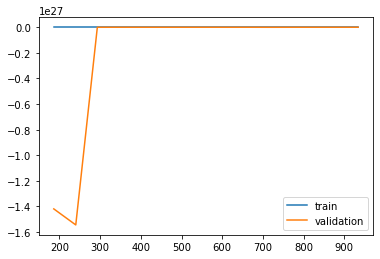

In [13]:
k,train_score, val_score= learning_curve(reg_lin,X_train, y_train,train_sizes= np.linspace(0.2,1,15), cv=5)

plt.plot(k, train_score.mean(axis=1), label="train")
plt.plot(k, val_score.mean(axis=1),label="validation")
plt.legend()


In [14]:
y_test_pred = reg_lin.predict(X_test)
y_train_pred = reg_lin.predict(X_train)

In [15]:
get_performances(real_value= y_test, estimated_value= y_test_pred, metrics=METRICS)

,metric,value
0,r2_score,-2.205280e+21
1,mean_squared_error,1.691522e+31
2,median_absolute_error,1.368400e+04
3,max_error,7.023345e+16


In [16]:
rmse_lin=rmse(y_test, y_test_pred)
rmse_lin

4112811382904312.5

# I.2 Regression ridge

In [17]:
NUMERIC_TRANSFORMER = [SimpleImputer(strategy="median"),
                        StandardScaler()]
CATEGORY_TRANSFORMER = [SimpleImputer(strategy="constant", fill_value="missing"),
                        OneHotEncoder(handle_unknown="ignore")]
reg_ridge = define_pipeline(estimator=RidgeCV,
                            parameters=None,
                            numeric_transformer=NUMERIC_TRANSFORMER,
                            categorical_transformer=CATEGORY_TRANSFORMER
                           )
reg_ridge

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                                                 verbose='deprecated')),
                                                                  (...
                                                                                 sparse='deprecated',
                                                                                 sparse_output=True))],
                                                           verbose=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000022CCCF5F190>)],
                                   verbose=False,
                                   verbose_feature_names_out=True)),
                ('regressor',
                 RidgeCV(alpha_per_target=False, alphas=(0.1, 1.0, 10.0),
                         cv=None, fit_intercept=True, gcv_mode=None,
                         scoring=None, store_cv_values=False))],
         verbose=False)

In [28]:
reg_ridge.fit(X_train, y_train)
print(f"Model score - training data: {reg_ridge.score(X_train, y_train)}")
print(f"Model score - test data: {reg_ridge.score(X_test, y_test)}")

Model score - training data: 0.8870165802834767
Model score - test data: 0.8726292139827336


In [19]:
rmse_rig= rmse(y_test,reg_ridge.predict(X_test))
rmse_rig

31256.606949863606

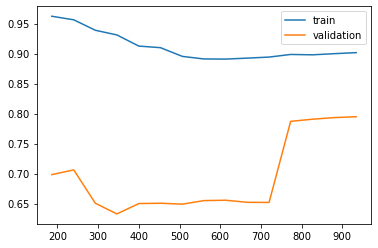

In [20]:
k,train_score, val_score= learning_curve(reg_ridge,X_train, y_train,train_sizes= np.linspace(0.2,1,15), cv=5)

plt.plot(k, train_score.mean(axis=1), label="train")
plt.plot(k, val_score.mean(axis=1),label="validation")
plt.legend()


In [98]:
k

array([186, 240, 293, 346, 400, 453, 507, 560, 613, 667, 720, 773, 827,
       880, 934])

# I.3 Random Forest

In [21]:
NUMERIC_TRANSFORMER = [SimpleImputer(strategy="median"),
                        StandardScaler()]
CATEGORY_TRANSFORMER = [SimpleImputer(strategy="constant", fill_value="missing"),
                        OneHotEncoder(handle_unknown="ignore")]
random = define_pipeline(estimator=RandomForestRegressor,
                            parameters=None,
                            numeric_transformer=NUMERIC_TRANSFORMER,
                            categorical_transformer=CATEGORY_TRANSFORMER
                           )
random

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                                                 verbose='deprecated')),
                                                                  (...
                ('regressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='squared_error',
                                       max_depth=None, max_features=1.0,
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [22]:
random.fit(X_train, y_train)
print(f"Model score - training data: {random.score(X_train, y_train)}")
print(f"Model score - test data: {random.score(X_test, y_test)}")

Model score - training data: 0.9788659554078735
Model score - test data: 0.8891628610153818


In [23]:
rmse_rf= rmse(y_test,random.predict(X_test))
rmse_rf

29157.452081472402

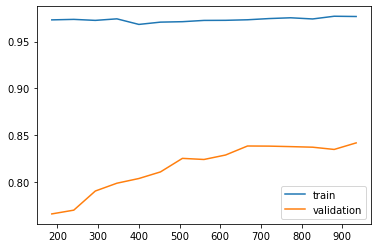

In [94]:
k,train_score, val_score= learning_curve(random,X_train, y_train,train_sizes= np.linspace(0.2,1,15), cv=5)

plt.plot(k, train_score.mean(axis=1), label="train")
plt.plot(k, val_score.mean(axis=1),label="validation")
plt.legend()

# I.4 Gradient Boosting

In [24]:
NUMERIC_TRANSFORMER = [SimpleImputer(strategy="median"),
                        StandardScaler()]
CATEGORY_TRANSFORMER = [SimpleImputer(strategy="constant", fill_value="missing"),
                        OneHotEncoder(handle_unknown="ignore")]
GBR = define_pipeline(estimator=GradientBoostingRegressor,
                            parameters=None,
                            numeric_transformer=NUMERIC_TRANSFORMER,
                            categorical_transformer=CATEGORY_TRANSFORMER
                           )
GBR

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                                                 verbose='deprecated')),
                                                                  (...
                                           criterion='friedman_mse', init=None,
                                           learning_rate=0.1,
                                           loss='squared_error', max_depth=3,
                                           max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=100,
                                           n_iter_no_change=None,
                                           random_state=None, subsample=1.0,
                                           tol=0.0001, validation_fraction=0.1,
                                           verbose=0, warm_start=False))],
         verbose=False)

In [25]:
GBR.fit(X_train, y_train)
print(f"Model score - training data: {GBR.score(X_train, y_train)}")
print(f"Model score - test data: {GBR.score(X_test, y_test)}")

Model score - training data: 0.9708317700716679
Model score - test data: 0.9094857278196274


In [26]:
rmse_GBR=rmse(y_test,GBR.predict(X_test))
rmse_GBR

26349.079567028144

In [27]:
#MODELES= [("Regression lineaire",rmse_lin),("RigeCV",rmse_rig), ("Randomforest",rmse_rf),("GradientBoosting",rmse_GBR)]

In [121]:
MODELES= [("RigeCV",rmse_rig), ("Randomforest",rmse_rf),("GradientBoosting",rmse_GBR)]

In [122]:
erreur_sans_traitement= pd.DataFrame(MODELES, columns=["MODELES","RMSE"])

In [123]:
erreur_sans_traitement

,MODELES,RMSE
0,RigeCV,31256.606950
1,Randomforest,28520.937827
2,GradientBoosting,26926.673916


<AxesSubplot:xlabel='MODELES', ylabel='RMSE'>

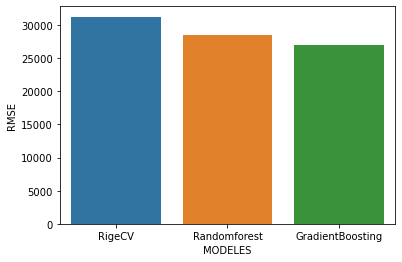

In [124]:
sns.barplot(x= 'MODELES', y= 'RMSE', data=erreur_sans_traitement)

In [93]:
MODELES_score= [("RigeCV",reg_ridge.score(X_test, y_test)), ("Randomforest",random.score(X_test, y_test)),("GradientBoosting",GBR.score(X_test, y_test))]

In [94]:
Score= pd.DataFrame(MODELES_score, columns=["MODELES_score","R2_SCORE"])
Score

,MODELES_score,R2_SCORE
0,RigeCV,0.877623
1,Randomforest,0.890508
2,GradientBoosting,0.900601


<AxesSubplot:xlabel='MODELES_score', ylabel='R2_SCORE'>

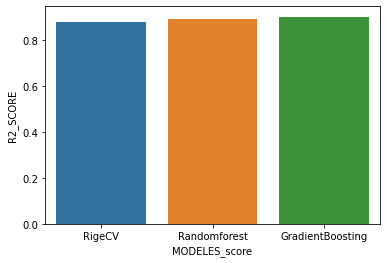

In [96]:
sns.barplot(x= 'MODELES_score', y= 'R2_SCORE', data=Score)

# II Amelioration des modeles

## features selection

Les cas de multicolinéarité décelés dans le preprocessing sont les suivantes :

- TotalBsmtSF= BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF.
- GrLivArea=1stFlrSF+2ndFlrSF+LowQualFinSF
 
 Dans le souci d'avoir des variables explicatives indépendantes et au vu de la corrélation entre ces variables et la variable à prédire, nous utiliserons uniquement les variables TotalBsmtSF,BsmtFinSF1,GrLivArea, 1stFlrSF pour la construction des modèles.

Le nombre de voiture que peut contenir un garage dépend fortement de la surface du garage comme le montre le coéfficient de corrélation (0.8) entre la variable GarageCar et GarageArea. De ce fait, nous considérerons l'une des deux variables(la variable GarageCar car ayant un coefficient de corrélation de 0.64 avecla variable à prédire) 

Les données de la variable BedroomAbvGr sont contenues dans la varaible TotRmsAbvGrd. De ce fait, seule cette dernière sera considérée.

Pour la construction du modèle, nous utiliserons les variables ayant un coefficient de corrélation supérieur ou égale à 0,3  pour les variables numériques et les variables fortement correlés (coefficient de corrélation superieur à 0,6) pour les variables catégorielles avec la variable à prédire

Les variables FullBath, BsmtFullBath  seront sommées pour former la variable TotBath : nombre total de salle de bains


## Features ingeneering

In [104]:
df=df.assign(TotBath= df[['FullBath','BsmtFullBath']].sum(axis=1))


In [105]:
# Looking for outliers, as indicated in https://ww2.amstat.org/publications/jse/v19n3/decock.pdf
df = df[df.GrLivArea < 4000]

In [106]:
train = df.drop(['SalePrice','Id'], axis=1)
y = df['SalePrice']

In [27]:
#variables= make_pipeline( SelectKBest(f_classif, k=20)

In [28]:
#X_new = variables.fit_transform(train, y)

In [107]:
X=train.drop(['RoofMatl','LandContour','LotConfig','Utilities','Street','LandSlope','Heating','Electrical','Functional',
              'PavedDrive','Condition2','Condition1', 'EnclosedPorch','3SsnPorch','ScreenPorch','BsmtFinSF1','BsmtFinSF2',
              'BsmtUnfSF','1stFlrSF','2ndFlrSF', 'LowQualFinSF','GarageArea','BedroomAbvGr','FullBath','BsmtFullBath','HalfBath',
              'BsmtHalfBath','KitchenAbvGr','YrSold','MoSold','ExterCond','BsmtExposure','PoolQC',
              'MiscFeature','Alley','FireplaceQu','BsmtFinType2', 'SaleCondition','Fence','MiscVal','LotShape',
              'RoofStyle','PoolArea','MSSubClass', 'BsmtFinType2','LotFrontage', 'LotArea',
               'OverallCond','BsmtCond','GarageCond'], axis=1)

###  Division de la base

In [108]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)
        

In [109]:
categorical_features = X.select_dtypes(include="object").columns
print(f"Categorical features:\n {categorical_features}\n")

numerical_features = X.select_dtypes(include="number").columns
print(f"Numerical features:\n {numerical_features}")

Categorical features:
 Index(['MSZoning', 'Neighborhood', 'BldgType', 'HouseStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'CentralAir', 'GarageType',
       'GarageFinish', 'SaleType'],
      dtype='object')

Numerical features:
 Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       'BsmtQual', 'BsmtFinType1', 'TotalBsmtSF', 'HeatingQC', 'GrLivArea',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageQual', 'WoodDeckSF', 'OpenPorchSF', 'TotBath'],
      dtype='object')


# regression lineare

In [40]:
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")),
                                      ("scaler", RobustScaler())]
                              )

categorical_transformer = make_pipeline(*[SimpleImputer(strategy="constant", fill_value="missing"),
                                          OneHotEncoder(handle_unknown="ignore")]
                                       )


preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Append regressor to preprocessing pipeline.
# Now we have a full prediction pipeline.
reg_sim = Pipeline(
    steps=[ ("preprocessor", preprocessor), ("regressor", LinearRegression())]
)
reg_sim

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                                                 verbose='deprecated')),
                                                                  ('scale...
                                                                                 sparse_output=True))],
                                                           verbose=False),
                                                  Index(['MSZoning', 'Neighborhood', 'BldgType', 'HouseStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'CentralAir', 'GarageType',
       'GarageFinish', 'SaleType'],
      dtype='object'))],
                                   verbose=False,
                                   verbose_feature_names_out=True)),
                ('regressor',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  positive=False))],
         verbose=False)

In [41]:
reg_sim.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                                                 verbose='deprecated')),
                                                                  ('scale...
                                                                                 sparse_output=True))],
                                                           verbose=False),
                                                  Index(['MSZoning', 'Neighborhood', 'BldgType', 'HouseStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'CentralAir', 'GarageType',
       'GarageFinish', 'SaleType'],
      dtype='object'))],
                                   verbose=False,
                                   verbose_feature_names_out=True)),
                ('regressor',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  positive=False))],
         verbose=False)

In [42]:
y_test_pred1 = reg_sim.predict(X_test)
y_train_pred1 = reg_sim.predict(X_train)

In [43]:
get_performances(y_test,y_test_pred1,METRICS)

,metric,value
0,r2_score,8.713263e-01
1,mean_squared_error,6.753334e+08
2,median_absolute_error,1.469058e+04
3,max_error,8.253038e+04


In [137]:
rmse_lin2=rmse(y_test,y_test_pred1)
rmse_lin2

25987.178403037906

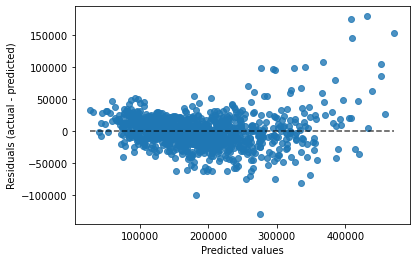

In [144]:
display = PredictionErrorDisplay(y_true=y_train, y_pred=y_train_pred1)
display.plot()
plt.show()

### transformation de la variable cible

Dans l'analyse exploratoire des données, nous avons remarqué que c'est en appliquant le logarithme à la variables cible que nous avions une distribution normale des ecarts entre les valeurs. d'où l'idée d'appliquer une transformation logarithmique à la variable cible.

In [45]:
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")),
                                      ("scaler", RobustScaler())]
                              )

categorical_transformer = make_pipeline(*[SimpleImputer(strategy="constant", fill_value="missing"),
                                          OneHotEncoder(handle_unknown="ignore")]
                                       )


preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Append regressor to preprocessing pipeline.
# Now we have a full prediction pipeline.
reg = Pipeline(
    steps=[ ("preprocessor", preprocessor), ("Transformateur",TransformedTargetRegressor(
    regressor=LinearRegression(), func=np.log1p, inverse_func=np.expm1
) )]
)
reg

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                                                 verbose='deprecated')),
                                                                  ('scale...
       'Exterior2nd', 'MasVnrType', 'Foundation', 'CentralAir', 'GarageType',
       'GarageFinish', 'SaleType'],
      dtype='object'))],
                                   verbose=False,
                                   verbose_feature_names_out=True)),
                ('Transformateur',
                 TransformedTargetRegressor(check_inverse=True,
                                            func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=LinearRegression(copy_X=True,
                                                                       fit_intercept=True,
                                                                       n_jobs=None,
                                                                       positive=False),
                                            transformer=None))],
         verbose=False)

In [46]:
reg.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                                                 verbose='deprecated')),
                                                                  ('scale...
       'Exterior2nd', 'MasVnrType', 'Foundation', 'CentralAir', 'GarageType',
       'GarageFinish', 'SaleType'],
      dtype='object'))],
                                   verbose=False,
                                   verbose_feature_names_out=True)),
                ('Transformateur',
                 TransformedTargetRegressor(check_inverse=True,
                                            func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=LinearRegression(copy_X=True,
                                                                       fit_intercept=True,
                                                                       n_jobs=None,
                                                                       positive=False),
                                            transformer=None))],
         verbose=False)

### Entrainement

In [52]:
y_test_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

### evaluation du modèle

In [53]:
print(f"Model score - training data: {reg.score(X_train, y_train)}")
print(f"Model score - test data: {reg.score(X_test, y_test)}")

Model score - training data: 0.9295161626903266
Model score - test data: 0.9085511512171359


In [54]:
# get performances in train & test
get_all_performances(value_train=(y_train, y_train_pred),
                     values_test=(y_test, y_test_pred),
                     metrics=METRICS
                    )


,metric,train,test
0,r2_score,9.295162e-01,9.085512e-01
1,mean_squared_error,4.249708e+08,4.799618e+08
2,median_absolute_error,9.852618e+03,1.133227e+04
3,max_error,1.526521e+05,8.617520e+04


In [55]:
n= X_test.shape[0]

In [56]:
def r_score_ajuste(x,y,r):
    n= X.shape[0]
    p= X.shape[1]
    r_score_ajuste = 1-(1-r)*(n-1)/(n-p-1)
    return r_score_ajuste

In [57]:
 r_score_ajuste(X_train, y_train,reg.score(X_train, y_train))

0.9279817533106918

In [58]:
 r_score_ajuste(X_test, y_test,reg.score(X_test, y_test))

0.9065603406045876

In [138]:
rmse_lin_trans=rmse(y_test,y_test_pred)
rmse_lin_trans

21908.030817946597

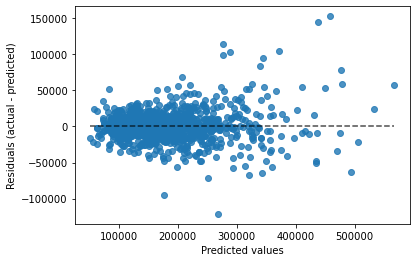

In [60]:
display = PredictionErrorDisplay(y_true=y_train, y_pred=y_train_pred)
display.plot()
plt.show()

Text(0.5, 1.0, 'linear regression \n with target transformation')

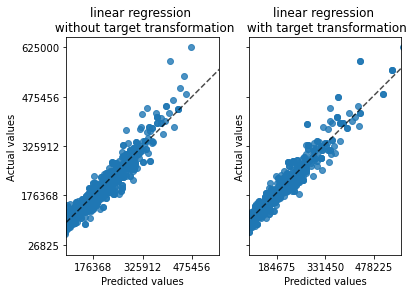

In [61]:
f, (ax0, ax1) = plt.subplots(1, 2, sharey=True)
PredictionErrorDisplay.from_predictions( y_true=y_train, y_pred=y_train_pred, 
                                        kind="actual_vs_predicted", ax=ax1)
PredictionErrorDisplay.from_predictions( y_true=y_train, y_pred=y_train_pred1, 
                                        kind="actual_vs_predicted", ax=ax0)
   
ax0.set_title("linear regression \n without target transformation")
ax1.set_title("linear regression \n with target transformation")


Text(0.5, 1.0, 'Residual in linear regression \n with target transformation')

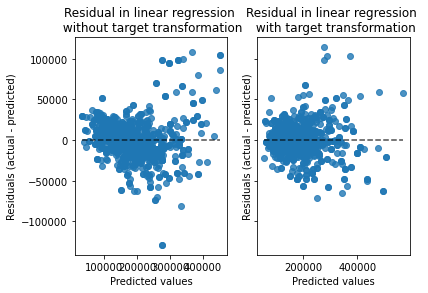

In [62]:
f, (ax0, ax1) = plt.subplots(1, 2, sharey=True)

PredictionErrorDisplay.from_predictions(y_true=y_train, y_pred=y_train_pred,kind="residual_vs_predicted", ax=ax1)
PredictionErrorDisplay.from_predictions(y_true=y_train, y_pred=y_train_pred1,kind="residual_vs_predicted", ax=ax0)

ax0.set_title("Residual in linear regression \n without target transformation")
ax1.set_title("Residual in linear regression \n with target transformation")


### Selection du modele

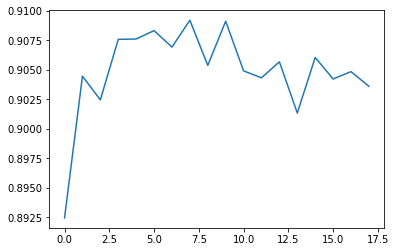

In [63]:
val_score = []
for k in range(2,20):
    scores = cross_val_score(reg,X_train, y_train, cv = k).mean()
    val_score.append(scores)
plt.plot(val_score)
    

In [64]:
scores = cross_val_score(reg,X_train, y_train, cv = 9)
result=scores.max()

In [65]:
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.88833814 0.91829274 0.91775748 0.91311522 0.92632598 0.91475613
 0.88208039 0.87730685 0.94478189]
Average CV Score:  0.9091949794144344
Number of CV Scores used in Average:  9


In [66]:
param_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median","most_frequent"],
    "preprocessor__num__scaler": [ StandardScaler(), MinMaxScaler(), RobustScaler()],
    
}

grid_search = GridSearchCV(reg, param_grid, cv=9, scoring="r2", return_train_score=True) # r2
# you can see the list of key for scoring: sorted(sklearn.metrics.SCORERS.keys())
grid_search

GridSearchCV(cv=9, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                                                                                        fill_value=None,
                                                                                                        keep_empty_features=False,
                                                                                                        missing_values=nan,
                                                                                                        stra...
                                                                  'median',
                                                                  'most_frequent'],
                         'preprocessor__num__scaler': [StandardScaler(copy=True,
                                                                      with_mean=True,
                                                                      with_std=True),
                                                       MinMaxScaler(clip=False,
                                                                    copy=True,
                                                                    feature_range=(0,
                                                                                   1)),
                                                       RobustScaler(copy=True,
                                                                    quantile_range=(25.0,
                                                                                    75.0),
                                                                    unit_variance=False,
                                                                    with_centering=True,
                                                                    with_scaling=True)]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=0)

In [49]:
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best params: {best_params}")

Best params: {'preprocessor__num__imputer__strategy': 'mean', 'preprocessor__num__scaler': RobustScaler(copy=True, quantile_range=(25.0, 75.0), unit_variance=False,
             with_centering=True, with_scaling=True)}


In [50]:
model= grid_search.best_estimator_

In [51]:
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                                                                 verbose='deprecated')),
                                                                  ('scaler'...
       'Exterior2nd', 'MasVnrType', 'Foundation', 'CentralAir', 'GarageType',
       'GarageFinish', 'SaleType'],
      dtype='object'))],
                                   verbose=False,
                                   verbose_feature_names_out=True)),
                ('Transformateur',
                 TransformedTargetRegressor(check_inverse=True,
                                            func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=LinearRegression(copy_X=True,
                                                                       fit_intercept=True,
                                                                       n_jobs=None,
                                                                       positive=False),
                                            transformer=None))],
         verbose=False)

In [52]:
y_test_pred2 = model.predict(X_test)
y_train_pred2 = model.predict(X_train)

In [53]:
print(f"Model score - training data: {model.score(X_train, y_train)}")
print(f"Model score - test data: {model.score(X_test, y_test)}")

Model score - training data: 0.9295161626903266
Model score - test data: 0.9085511512171359


In [70]:
reg_estimator = reg_sim["regressor"]

In [71]:
def get_input_features(model_pipeline, cat_step_name):
    """ Get model feature names used in training
    
    """

    all_feature_names = []

    for step_name, pipe_trans, feat_names in reg["preprocessor"].transformers_:
        if step_name == cat_step_name:
            all_feature_names.extend(pipe_trans
                                 .named_steps["onehotencoder"]
                                 .get_feature_names_out(input_features=categorical_features)
                                )
        else:
            all_feature_names.extend(feat_names)
    return all_feature_names

In [72]:
model_features = get_input_features(model_pipeline=reg_sim, cat_step_name="cat")

In [73]:
df_feature_importance = pd.DataFrame(reg_estimator.coef_, columns=["coef"], index=model_features)
df_feature_importance


,coef
OverallQual,19237.089955
YearBuilt,4197.325277
YearRemodAdd,4206.228704
MasVnrArea,8627.421081
ExterQual,6074.776044
...,...
SaleType_ConLI,-16303.709583
SaleType_ConLw,-1099.867282
SaleType_New,17055.154823
SaleType_Oth,-10822.248435


## variables importantes

Il s'agit des variables dont les valeurs absolues des coefficients sont les plus élevées

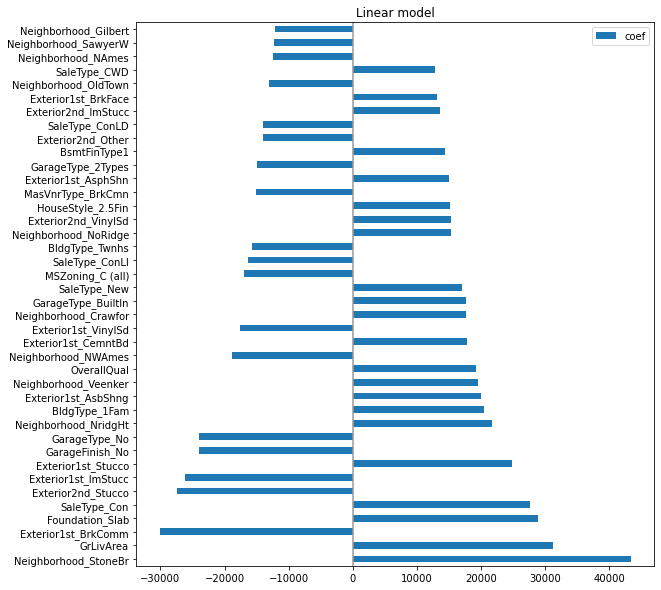

In [169]:
# top30 most important features
(df_feature_importance
 .sort_values("coef", key=lambda v: abs(v), ascending=False)
 .head(40)
 .plot(kind="barh", figsize=(12, 10))
)
plt.title("Linear model")
plt.axvline(x=0, color='.6')
plt.subplots_adjust(left=.3);

# Regression RIDGE

In [74]:
def define_pipeline(estimator,
                    parameters,
                    numeric_transformer,
                    categorical_transformer
                   ):
    """ Construct a Pipeline from the given transfomers & estimators
    """
    if not parameters:
        parameters = dict()
    numeric_transformer = make_pipeline(*numeric_transformer)
    categorical_transformer = make_pipeline(*categorical_transformer)


    preprocessor = ColumnTransformer(
        transformers=[
            ("num", make_pipeline(*numeric_transformer), make_column_selector(dtype_include="number")),
            ("cat", make_pipeline(*categorical_transformer), make_column_selector(dtype_include=["object"])),
        ]
    )

    # Append estimator to preprocessing pipeline.
    # Now we have a full prediction pipeline.
    return Pipeline(steps=[("preprocessor", preprocessor), ("regressor", estimator(**parameters))])

In [75]:
NUMERIC_TRANSFORMER = [SimpleImputer(strategy="mean"),
                       RobustScaler()]
CATEGORY_TRANSFORMER = [SimpleImputer(strategy="constant", fill_value="missing"),
                        OneHotEncoder(handle_unknown="ignore")]
reg_ridge = define_pipeline(estimator=RidgeCV,
                            parameters= None,
                            numeric_transformer=NUMERIC_TRANSFORMER,
                            categorical_transformer=CATEGORY_TRANSFORMER
                           )
reg_ridge

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                                                                 verbose='deprecated')),
                                                                  ('r...
                                                                                 sparse='deprecated',
                                                                                 sparse_output=True))],
                                                           verbose=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000022CCDEA4A90>)],
                                   verbose=False,
                                   verbose_feature_names_out=True)),
                ('regressor',
                 RidgeCV(alpha_per_target=False, alphas=(0.1, 1.0, 10.0),
                         cv=None, fit_intercept=True, gcv_mode=None,
                         scoring=None, store_cv_values=False))],
         verbose=False)

In [76]:
reg_ridge.fit(X_train, y_train)
print(f"Model score - training data: {reg_ridge.score(X_train, y_train)}")
print(f"Model score - test data: {reg_ridge.score(X_test, y_test)}")

Model score - training data: 0.8951854853783824
Model score - test data: 0.8776228289197618


In [77]:
def define_pipeline_2(estimator,
                    parameters,
                    numeric_transformer,
                    categorical_transformer
                   ):
    """ Construct a Pipeline from the given transfomers & estimators
    """
    if not parameters:
        parameters = dict()
    numeric_transformer = make_pipeline(*numeric_transformer)
    categorical_transformer = make_pipeline(*categorical_transformer)


    preprocessor = ColumnTransformer(
        transformers=[
            ("num", make_pipeline(*numeric_transformer), make_column_selector(dtype_include="number")),
            ("cat", make_pipeline(*categorical_transformer), make_column_selector(dtype_include=["object"])),
        ]
    )

    # Append estimator to preprocessing pipeline.
    # Now we have a full prediction pipeline.
    return Pipeline(steps=[("preprocessor", preprocessor), ("Transformateur",TransformedTargetRegressor( 
        regressor=estimator(**parameters), func=np.log1p, inverse_func=np.expm1))])

In [78]:
NUMERIC_TRANSFORMER = [SimpleImputer(strategy="mean"),
                       RobustScaler()]
CATEGORY_TRANSFORMER = [SimpleImputer(strategy="constant", fill_value="missing"),
                        OneHotEncoder(handle_unknown="ignore")]
reg_ridge_trans = define_pipeline_2(estimator=RidgeCV,
                            parameters= None,
                            numeric_transformer=NUMERIC_TRANSFORMER,
                            categorical_transformer=CATEGORY_TRANSFORMER
                           )
reg_ridge_trans

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                                                                 verbose='deprecated')),
                                                                  ('r...
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000022CCDEF47C0>)],
                                   verbose=False,
                                   verbose_feature_names_out=True)),
                ('Transformateur',
                 TransformedTargetRegressor(check_inverse=True,
                                            func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=RidgeCV(alpha_per_target=False,
                                                              alphas=(0.1, 1.0,
                                                                      10.0),
                                                              cv=None,
                                                              fit_intercept=True,
                                                              gcv_mode=None,
                                                              scoring=None,
                                                              store_cv_values=False),
                                            transformer=None))],
         verbose=False)

In [79]:
reg_ridge_trans.fit(X_train, y_train)
print(f"Model score - training data: {reg_ridge_trans.score(X_train, y_train)}")
print(f"Model score - test data: {reg_ridge_trans.score(X_test, y_test)}")

Model score - training data: 0.9253589711122614
Model score - test data: 0.9079052539928101


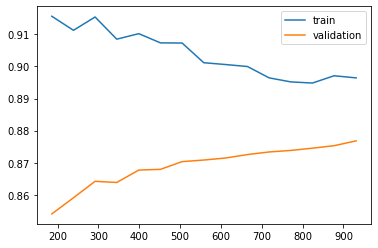

In [80]:
 # la courbe d'apprentissage 
    
k,train_score, val_score= learning_curve(reg_ridge,X_train, y_train,train_sizes= np.linspace(0.2,1,15), cv=5)

plt.plot(k, train_score.mean(axis=1), label="train")
plt.plot(k, val_score.mean(axis=1),label="validation")
plt.legend()


In [82]:
reg_estimator = reg_ridge["regressor"]
df_feature_importance2 = pd.DataFrame(reg_estimator.coef_, columns=["coef"], index=model_features)
print(f"Shape: {df_feature_importance.shape}")
df_feature_importance.head()

Shape: (125, 1)


,coef
OverallQual,19237.089955
YearBuilt,4197.325277
YearRemodAdd,4206.228704
MasVnrArea,8627.421081
ExterQual,6074.776044


## variables importantes

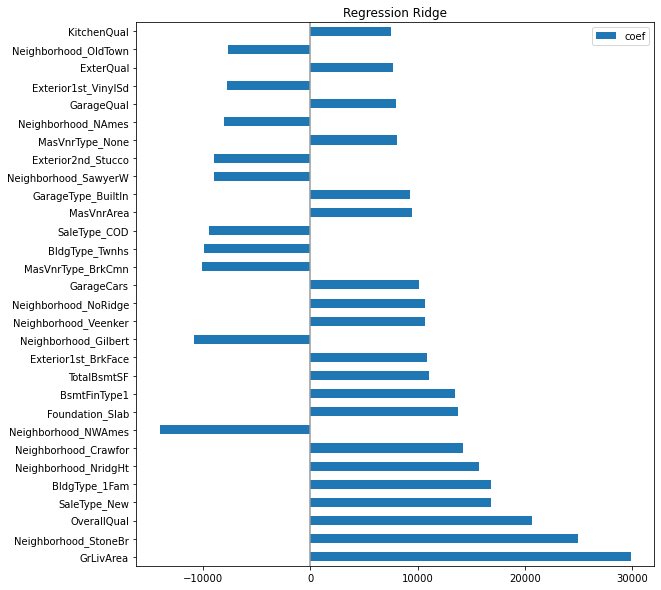

In [84]:
(df_feature_importance2
 .sort_values("coef", key=lambda v: abs(v), ascending=False)
 .head(30)
 .plot(kind="barh", figsize=(12, 10))
)
plt.title("Regression Ridge")
plt.axvline(x=0, color='.6')
plt.subplots_adjust(left=.3);

Text(0.5, 1.0, 'ridge regression \n with target transformation')

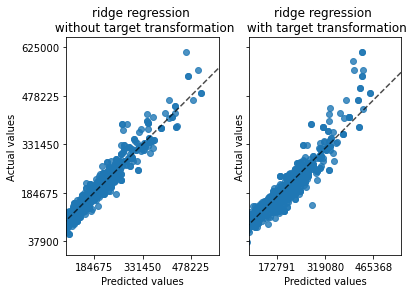

In [187]:
f, (ax0, ax1) = plt.subplots(1, 2, sharey=True)

PredictionErrorDisplay.from_predictions( y_true= y_train, y_pred= reg_ridge.predict(X_train), 
                                        kind="actual_vs_predicted", ax=ax1)
PredictionErrorDisplay.from_predictions( y_true=y_train, y_pred= reg_ridge_trans.predict(X_train), 
                                        kind="actual_vs_predicted", ax=ax0)
   
ax0.set_title("ridge regression \n without target transformation")
ax1.set_title("ridge regression \n with target transformation")


## Distribution du résidu

Text(0.5, 1.0, 'Residual in ridge regression \n with target transformation')

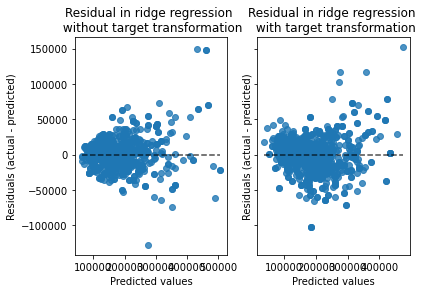

In [188]:
f, (ax0, ax1) = plt.subplots(1, 2, sharey=True)

PredictionErrorDisplay.from_predictions(y_true=y_train, y_pred=reg_ridge.predict(X_train),kind="residual_vs_predicted", ax=ax1)
PredictionErrorDisplay.from_predictions(y_true=y_train, y_pred=reg_ridge_trans.predict(X_train),kind="residual_vs_predicted", ax=ax0)

ax0.set_title("Residual in ridge regression \n without target transformation")
ax1.set_title("Residual in ridge regression \n with target transformation")


In [189]:
# get performances in train & test
get_all_performances(value_train=(y_train, reg_ridge.predict(X_train)),
                     values_test=(y_test, reg_ridge.predict(X_test)),
                     metrics=METRICS
                    )

,metric,train,test
0,r2_score,8.951855e-01,8.776228e-01
1,mean_squared_error,6.319621e+08,6.422866e+08
2,median_absolute_error,1.302924e+04,1.467503e+04
3,max_error,1.810010e+05,8.578102e+04


In [190]:
# get performances in train & test
get_all_performances(value_train=(y_train, reg_ridge_trans.predict(X_train)),
                     values_test=(y_test, reg_ridge_trans.predict(X_test)),
                     metrics=METRICS
                    )

,metric,train,test
0,r2_score,9.253590e-01,9.079053e-01
1,mean_squared_error,4.500360e+08,4.833518e+08
2,median_absolute_error,1.003512e+04,1.150755e+04
3,max_error,1.497975e+05,8.913985e+04


In [139]:
rmse_ridge=rmse(y_test,reg_ridge.predict(X_test))
rmse_ridge

25343.37365109918

In [140]:
rmse_ridge_trans=rmse(y_test,reg_ridge_trans.predict(X_test))
rmse_ridge_trans

21985.262180659294

# RandomForestRegressor

Le random forest est adapté lorsqu'on a plusieurs variables explicatives. Il permet de selectionner les variables les plus importantes pour la construction du modèle. Sa force réside dans sa capacité à gérer les valeurs manquantantes et les valeurs abérrantes

In [85]:
NUMERIC_TRANSFORMER = [SimpleImputer(strategy="median"),
                        StandardScaler()]
CATEGORY_TRANSFORMER = [SimpleImputer(strategy="constant", fill_value="missing"),
                        OneHotEncoder(handle_unknown="ignore")]
random = define_pipeline(estimator=RandomForestRegressor,
                            parameters=None,
                            numeric_transformer=NUMERIC_TRANSFORMER,
                            categorical_transformer=CATEGORY_TRANSFORMER
                           )
random

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                                                 verbose='deprecated')),
                                                                  (...
                ('regressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='squared_error',
                                       max_depth=None, max_features=1.0,
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [86]:
random.fit(X_train, y_train)
print(f"Model score - training data: {random.score(X_train, y_train)}")
print(f"Model score - test data: {random.score(X_test, y_test)}")

Model score - training data: 0.9830879585957631
Model score - test data: 0.890508123438592


In [87]:
random_trans = define_pipeline_2(estimator=RandomForestRegressor,
                            parameters=None,
                            numeric_transformer=NUMERIC_TRANSFORMER,
                            categorical_transformer=CATEGORY_TRANSFORMER
                           )
random_trans

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                                                 verbose='deprecated')),
                                                                  (...
                                            regressor=RandomForestRegressor(bootstrap=True,
                                                                            ccp_alpha=0.0,
                                                                            criterion='squared_error',
                                                                            max_depth=None,
                                                                            max_features=1.0,
                                                                            max_leaf_nodes=None,
                                                                            max_samples=None,
                                                                            min_impurity_decrease=0.0,
                                                                            min_samples_leaf=1,
                                                                            min_samples_split=2,
                                                                            min_weight_fraction_leaf=0.0,
                                                                            n_estimators=100,
                                                                            n_jobs=None,
                                                                            oob_score=False,
                                                                            random_state=None,
                                                                            verbose=0,
                                                                            warm_start=False),
                                            transformer=None))],
         verbose=False)

In [88]:
random_trans.fit(X_train, y_train)
print(f"Model score - training data: {random_trans.score(X_train, y_train)}")
print(f"Model score - test data: {random_trans.score(X_test, y_test)}")

Model score - training data: 0.9817381952174767
Model score - test data: 0.8891251391508328


Text(0.5, 1.0, 'random forest \n with target transformation')

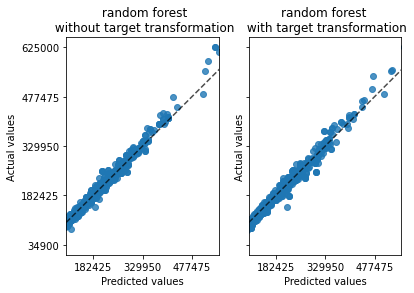

In [198]:
f, (ax0, ax1) = plt.subplots(1, 2, sharey=True)

PredictionErrorDisplay.from_predictions( y_true=y_train, y_pred= random.predict(X_train), 
                                        kind="actual_vs_predicted", ax=ax1)
PredictionErrorDisplay.from_predictions( y_true=y_train, y_pred= random_trans.predict(X_train), 
                                        kind="actual_vs_predicted", ax=ax0)
   
ax0.set_title(" random forest\n without target transformation")
ax1.set_title("random forest \n with target transformation")


Text(0.5, 1.0, 'Residual in random forest \n with target transformation')

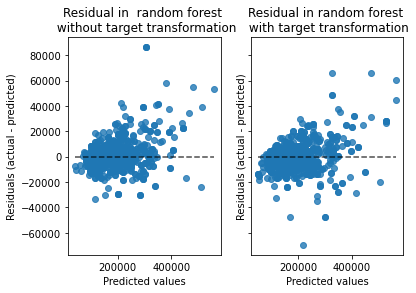

In [199]:
f, (ax0, ax1) = plt.subplots(1, 2, sharey=True)

PredictionErrorDisplay.from_predictions(y_true=y_train, y_pred=random.predict(X_train),kind="residual_vs_predicted", ax=ax1)
PredictionErrorDisplay.from_predictions(y_true=y_train, y_pred=random_trans.predict(X_train),kind="residual_vs_predicted", ax=ax0)

ax0.set_title("Residual in  random forest \n without target transformation")
ax1.set_title("Residual in random forest \n with target transformation")


In [149]:
rmse_random=rmse(y_test,random.predict(X_test))
rmse_random

23972.049809383254

In [150]:
rmse_random_trans=rmse(y_test,random_trans.predict(X_test))
rmse_random_trans

24122.969389177684

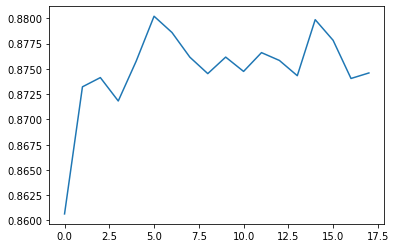

In [78]:
val_score = []
for k in range(2,20):
    scores = cross_val_score(random,X_train, y_train, cv = k).mean()
    val_score.append(scores)
plt.plot(val_score)
    

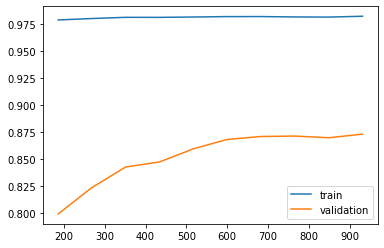

In [79]:
 # la courbe d'apprentissage 
    
k,train_score, val_score= learning_curve(random,X_train, y_train,train_sizes= np.linspace(0.2,1,10), cv=5)

plt.plot(k, train_score.mean(axis=1), label="train")
plt.plot(k, val_score.mean(axis=1),label="validation")
plt.legend()


il semble y avoir un sur apprentissage car le modèle est très performant sur le train set et moins performant sur le validation set. ceci semble dû à l'insuffisance des données fournies et non à l'ensemble d'apprentissage.

In [103]:
param_grid = {
    
    "regressor__n_estimators": [100,500,600,1000]
   
}

grid= GridSearchCV(random, param_grid, cv=9, scoring="r2", return_train_score=True) # r2
# you can see the list of key for scoring: sorted(sklearn.metrics.SCORERS.keys())
grid

GridSearchCV(cv=9, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('simpleimputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                                                                                        fill_value=None,
                                                                                                        keep_empty_features=False,
                                                                                                        missing_values=na...
                                                              min_impurity_decrease=0.0,
                                                              min_samples_leaf=1,
                                                              min_samples_split=2,
                                                              min_weight_fraction_leaf=0.0,
                                                              n_estimators=100,
                                                              n_jobs=None,
                                                              oob_score=False,
                                                              random_state=None,
                                                              verbose=0,
                                                              warm_start=False))],
                                verbose=False),
             n_jobs=None,
             param_grid={'regressor__n_estimators': [100, 500, 600, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=0)

In [104]:
grid.fit(X_train, y_train)

best_params = grid.best_params_
print(f"Best params: {best_params}")

Best params: {'regressor__n_estimators': 100}


In [108]:
# get performances in train & test
get_all_performances(value_train=(y_train,random.predict(X_train)),
                     values_test=(y_test, random.predict(X_test)),
                     metrics=METRICS
                    )


,metric,train,test
0,r2_score,9.816668e-01,8.847474e-01
1,mean_squared_error,1.105371e+08,6.048939e+08
2,mean_absolute_percentage_error,3.802346e-02,1.129372e-01
3,max_error,9.475027e+04,1.014851e+05


In [107]:
# get performances in train & test
get_all_performances(value_train=(y_train,random_trans.predict(X_train)),
                     values_test=(y_test, random_trans.predict(X_test)),
                     metrics=METRICS
                    )


,metric,train,test
0,r2_score,9.814105e-01,8.883529e-01
1,mean_squared_error,1.120826e+08,5.859705e+08
2,mean_absolute_percentage_error,3.570665e-02,1.083134e-01
3,max_error,9.575522e+04,1.136396e+05


# GradientBoostingRegressor

In [135]:
GBR = define_pipeline(estimator=GradientBoostingRegressor,
                            parameters=None,
                            numeric_transformer=NUMERIC_TRANSFORMER,
                            categorical_transformer=CATEGORY_TRANSFORMER
                           )
GBR 

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                                                 verbose='deprecated')),
                                                                  (...
                                           criterion='friedman_mse', init=None,
                                           learning_rate=0.1,
                                           loss='squared_error', max_depth=3,
                                           max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=100,
                                           n_iter_no_change=None,
                                           random_state=None, subsample=1.0,
                                           tol=0.0001, validation_fraction=0.1,
                                           verbose=0, warm_start=False))],
         verbose=False)

In [136]:
GBR.fit(X_train, y_train)
print(f"Model score - training data: {GBR.score(X_train, y_train)}")
print(f"Model score - test data: {GBR.score(X_test, y_test)}")

Model score - training data: 0.9603276750383117
Model score - test data: 0.9012433828653541


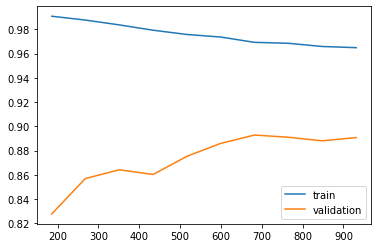

In [90]:
 # la courbe d'apprentissage 
    
k,train_score, val_score= learning_curve(GBR,X_train, y_train,train_sizes= np.linspace(0.2,1,10), cv=5)

plt.plot(k, train_score.mean(axis=1), label="train")
plt.plot(k, val_score.mean(axis=1),label="validation")
plt.legend()

In [205]:
y_test_pred4 = GBR.predict(X_test)
y_train_pred4 = GBR.predict(X_train)

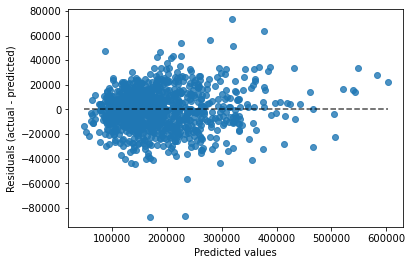

In [206]:
display = PredictionErrorDisplay(y_true=y_train, y_pred=y_train_pred4)
display.plot()
plt.show()

In [112]:
GBR_trans = define_pipeline_2(estimator=GradientBoostingRegressor,
                            parameters=None,
                            numeric_transformer=NUMERIC_TRANSFORMER,
                            categorical_transformer=CATEGORY_TRANSFORMER
                           )
GBR_trans

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                                                 verbose='deprecated')),
                                                                  (...
                                                                                learning_rate=0.1,
                                                                                loss='squared_error',
                                                                                max_depth=3,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_samples_leaf=1,
                                                                                min_samples_split=2,
                                                                                min_weight_fraction_leaf=0.0,
                                                                                n_estimators=100,
                                                                                n_iter_no_change=None,
                                                                                random_state=None,
                                                                                subsample=1.0,
                                                                                tol=0.0001,
                                                                                validation_fraction=0.1,
                                                                                verbose=0,
                                                                                warm_start=False),
                                            transformer=None))],
         verbose=False)

In [113]:
GBR_trans.fit(X_train, y_train)
print(f"Model score - training data: {GBR_trans.score(X_train, y_train)}")
print(f"Model score - test data: {GBR_trans.score(X_test, y_test)}")

Model score - training data: 0.9562115686975715
Model score - test data: 0.9105726601544455


Text(0.5, 1.0, 'gradient boosting \n with target transformation')

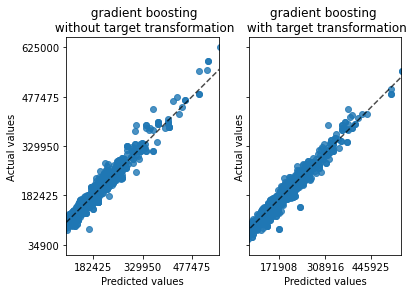

In [209]:
f, (ax0, ax1) = plt.subplots(1, 2, sharey=True)

PredictionErrorDisplay.from_predictions( y_true=y_train, y_pred= GBR.predict(X_train), 
                                        kind="actual_vs_predicted", ax=ax1)
PredictionErrorDisplay.from_predictions( y_true=y_train, y_pred= GBR_trans.predict(X_train), 
                                        kind="actual_vs_predicted", ax=ax0)
   
ax0.set_title(" gradient boosting\n without target transformation")
ax1.set_title("gradient boosting \n with target transformation")


Text(0.5, 1.0, 'Residual in random forest \n with target transformation')

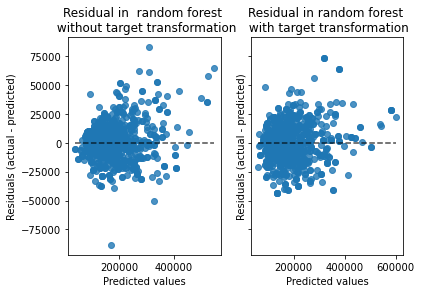

In [210]:
f, (ax0, ax1) = plt.subplots(1, 2, sharey=True)

PredictionErrorDisplay.from_predictions(y_true=y_train, y_pred=GBR.predict(X_train),kind="residual_vs_predicted", ax=ax1)
PredictionErrorDisplay.from_predictions(y_true=y_train, y_pred=GBR_trans.predict(X_train),kind="residual_vs_predicted", ax=ax0)

ax0.set_title("Residual in  random forest \n without target transformation")
ax1.set_title("Residual in random forest \n with target transformation")


In [141]:
rmse_GBR=rmse(y_test,GBR.predict(X_test))
rmse_GBR

22766.55528835733

In [142]:
rmse_GBR_trans=rmse(y_test,GBR_trans.predict(X_test))
rmse_GBR_trans


21664.535299812374

In [145]:
# get performances in train & test
get_all_performances(value_train=(y_train,GBR_trans.predict(X_train)),
                     values_test=(y_test,GBR.predict(X_test)),
                     metrics=METRICS
                    )

,metric,train,test
0,r2_score,9.562116e-01,9.012434e-01
1,mean_squared_error,2.640152e+08,5.183160e+08
2,median_absolute_error,7.948920e+03,1.223418e+04
3,max_error,1.104529e+05,1.086193e+05


In [144]:
# get performances in train & test
get_all_performances(value_train=(y_train, GBR_trans.predict(X_train)),
                     values_test=(y_test, GBR_trans.predict(X_test)),
                     metrics=METRICS
                    )

,metric,train,test
0,r2_score,9.562116e-01,9.105727e-01
1,mean_squared_error,2.640152e+08,4.693521e+08
2,median_absolute_error,7.948920e+03,1.142601e+04
3,max_error,1.104529e+05,1.066541e+05


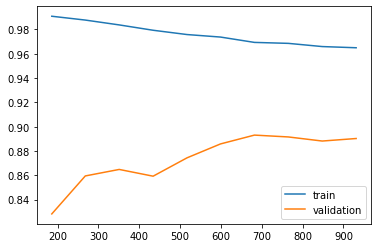

In [99]:
 # la courbe d'apprentissage 
    
k,train_score, val_score= learning_curve(GBR,X_train, y_train,train_sizes= np.linspace(0.2,1,10), cv=5)

plt.plot(k, train_score.mean(axis=1), label="train")
plt.plot(k, val_score.mean(axis=1),label="validation")
plt.legend()


In [146]:
model_features = get_input_features(model_pipeline=GBR, cat_step_name="cat")


In [ ]:
GBR.get_params()

In [ ]:
param_grid = {
     "preprocessor__num__simpleimputer__strategy": ["mean", "median","most_frequent"],
    "preprocessor__num__standardscaler": [ StandardScaler(), MinMaxScaler(), RobustScaler()],
    "regressor__alpha": [np.arange(1,50)],

   
}

grid2= GridSearchCV(GBR, param_grid, return_train_score=True) # r2
# you can see the list of key for scoring: sorted(sklearn.metrics.SCORERS.keys())
grid2

# CHOIX DU MODELE

In [151]:
MODELES_2= [("Regression lineaire ",rmse_lin2),("Regression lineaire + trans ",rmse_lin_trans),
          ("RigeCV",rmse_ridge), ("RigeCV + trans",rmse_ridge_trans), 
          ("Randomforest",rmse_random),("Randomforest + trans",rmse_random_trans),
            ("GradientBoosting",rmse_GBR),("GradientBoosting + trans",rmse_GBR_trans)]

In [221]:
erreur_avec_traitement= pd.DataFrame(MODELES_2, columns=["MODELES","RMSE"])
erreur_avec_traitement

,MODELES,RMSE
0,Regression lineaire,25987.178403
1,Regression lineaire + trans,21908.030818
2,RigeCV,25343.373651
3,RigeCV + trans,21985.262181
4,Randomforest,24476.061194
5,Randomforest + trans,23855.024041
6,GradientBoosting,22883.917259
7,GradientBoosting + trans,21634.688524


<AxesSubplot:xlabel='MODELES', ylabel='RMSE'>

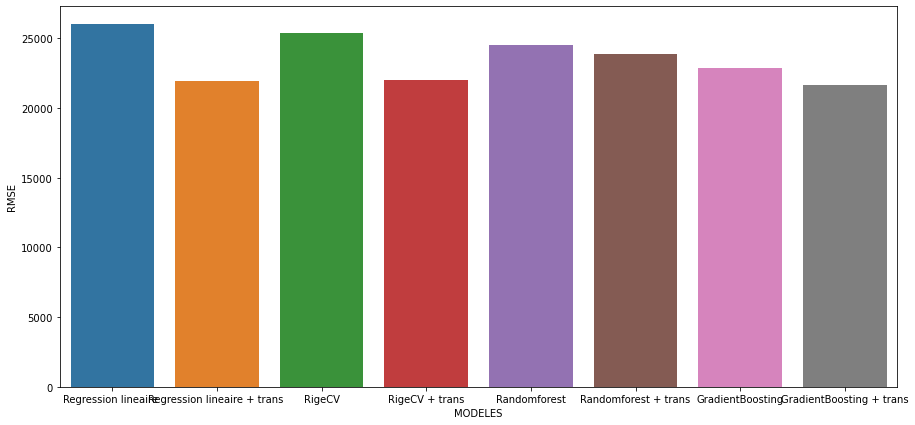

In [247]:
fig, axes = plt.subplots(figsize=(15, 7))

sns.barplot(x= 'MODELES', y= 'RMSE', data=erreur_avec_traitement, ax=axes)

In [120]:
MODELES_score_2= [("Regression lineaire ",reg_sim.score(X_test, y_test)),("Regression lineaire + trans ",reg.score(X_test, y_test)),
          ("RigeCV",reg_ridge.score(X_test, y_test)), ("RigeCV + trans",reg_ridge_trans.score(X_test, y_test)), 
          ("Randomforest",random.score(X_test, y_test)),("Randomforest + trans",random_trans.score(X_test, y_test)),
            ("GradientBoosting",GBR.score(X_test, y_test)),("GradientBoosting + trans",GBR_trans.score(X_test, y_test))
                 ]

In [121]:
Score_apres_traitement= pd.DataFrame(MODELES_score_2, columns=["MODELES_score_2","Score"])
Score_apres_traitement

,MODELES_score_2,Score
0,Regression lineaire,0.871326
1,Regression lineaire + trans,0.908551
2,RigeCV,0.877623
3,RigeCV + trans,0.907905
4,Randomforest,0.890508
5,Randomforest + trans,0.889125
6,GradientBoosting,0.901413
7,GradientBoosting + trans,0.910573


<AxesSubplot:xlabel='MODELES_score_2', ylabel='Score'>

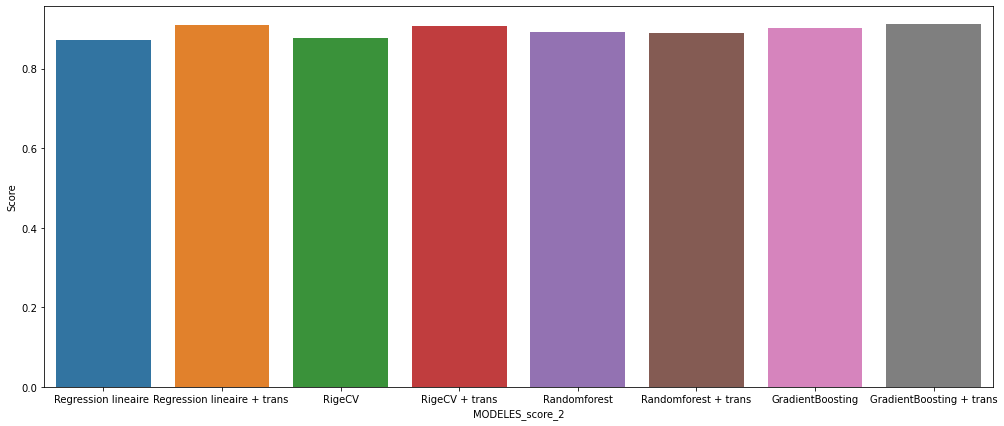

In [126]:
fig, axes = plt.subplots(figsize=(17, 7))

sns.barplot(x= 'MODELES_score_2', y= 'Score', data=Score_apres_traitement, ax=axes)

# PREDICTIONS

In [274]:
df = pd.read_csv("C:/Users/DELL/Desktop/ISE 2/Machine Learning/test.csv")

In [275]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [277]:
# FireplaceQu : data description says NA means "no fireplace"
df.loc[:, "FireplaceQu"] =  df.loc[:, "FireplaceQu"].fillna("No")

# LotFrontage : NA most likely means no lot frontage
df.loc[:, "LotFrontage"] =  df.loc[:, "LotFrontage"].fillna(0)

# GarageType etc : data description says NA for garage features is "no garage" 
df.loc[:, "GarageType"] =  df.loc[:, "GarageType"].fillna("No")
df.loc[:, "GarageFinish"] =  df.loc[:, "GarageFinish"].fillna("No")
df.loc[:, "GarageQual"] =  df.loc[:, "GarageQual"].fillna("No")
df.loc[:, "GarageCond"] =  df.loc[:, "GarageCond"].fillna("No") 
df.loc[:, "GarageYrBlt"] =  df.loc[:, "GarageYrBlt"].fillna(0)

# BsmtQual etc : data description says NA for basement features is "no basement" and error for id 333 and 949
df.loc[333, "BsmtFinType2"] ="Unf"
df.loc[949, "BsmtExposure"] ="Av"
df.loc[:, "BsmtQual"] =  df.loc[:, "BsmtQual"].fillna("No")
df.loc[:, "BsmtCond"] =  df.loc[:, "BsmtCond"].fillna("No")
df.loc[:, "BsmtExposure"] =  df.loc[:, "BsmtExposure"].fillna("No")
df.loc[:, "BsmtFinType1"] =  df.loc[:, "BsmtFinType1"].fillna("No")
df.loc[:, "BsmtFinType2"] =  df.loc[:, "BsmtFinType2"].fillna("No")

# MasVnrType : NA most likely means no veneer
df.loc[:, "MasVnrType"] =  df.loc[:, "MasVnrType"].fillna("None")
df.loc[:, "MasVnrArea"] =  df.loc[:, "MasVnrArea"].fillna(0)

    
# Electrical : NA most likely means not available
df.loc[:, "Electrical"] = df.loc[:, "Electrical"].fillna("SBrkr")

In [278]:
df = df.replace({"Alley" : {"Grvl" : 1, "Pave" : 2,"No" : 0},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

In [279]:
df=df.assign(TotBath= df[['FullBath','BsmtFullBath']].sum(axis=1))


In [280]:
test=df.drop(['RoofMatl','LandContour','LotConfig','Utilities','Street','LandSlope','Heating','Electrical','Functional',
              'PavedDrive','Condition2','Condition1', 'EnclosedPorch','3SsnPorch','ScreenPorch','BsmtFinSF1','BsmtFinSF2',
              'BsmtUnfSF','1stFlrSF','2ndFlrSF', 'LowQualFinSF','GarageArea','BedroomAbvGr','FullBath','BsmtFullBath','HalfBath',
              'BsmtHalfBath','KitchenAbvGr','YrSold','MoSold','ExterCond','BsmtExposure','PoolQC',
              'MiscFeature','Alley','FireplaceQu','BsmtFinType2', 'SaleCondition','Fence','MiscVal','LotShape',
              'RoofStyle','PoolArea','MSSubClass', 'BsmtFinType2','LotFrontage', 'LotArea',
               'OverallCond','BsmtCond','GarageCond'], axis=1)

In [281]:
id = test.Id

In [282]:
test

,Id,MSZoning,Neighborhood,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtFinType1,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,WoodDeckSF,OpenPorchSF,SaleType,TotBath
0,1461,RH,NAmes,1Fam,1Story,5,1961,1961,VinylSd,VinylSd,None,0.0,3,CBlock,3,3,882.0,3,Y,896,3.0,5,0,Attchd,1961.0,Unf,1.0,3,140,0,WD,1.0
1,1462,RL,NAmes,1Fam,1Story,6,1958,1958,Wd Sdng,Wd Sdng,BrkFace,108.0,3,CBlock,3,5,1329.0,3,Y,1329,4.0,6,0,Attchd,1958.0,Unf,1.0,3,393,36,WD,1.0
2,1463,RL,Gilbert,1Fam,2Story,5,1997,1998,VinylSd,VinylSd,None,0.0,3,PConc,4,6,928.0,4,Y,1629,3.0,6,1,Attchd,1997.0,Fin,2.0,3,212,34,WD,2.0
3,1464,RL,Gilbert,1Fam,2Story,6,1998,1998,VinylSd,VinylSd,BrkFace,20.0,3,PConc,3,6,926.0,5,Y,1604,4.0,7,1,Attchd,1998.0,Fin,2.0,3,360,36,WD,2.0
4,1465,RL,StoneBr,TwnhsE,1Story,8,1992,1992,HdBoard,HdBoard,None,0.0,4,PConc,4,5,1280.0,5,Y,1280,4.0,5,0,Attchd,1992.0,RFn,2.0,3,0,82,WD,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,RM,MeadowV,Twnhs,2Story,4,1970,1970,CemntBd,CmentBd,None,0.0,3,CBlock,3,1,546.0,4,Y,1092,3.0,5,0,No,0.0,No,0.0,0,0,0,WD,1.0
1455,2916,RM,MeadowV,TwnhsE,2Story,4,1970,1970,CemntBd,CmentBd,None,0.0,3,CBlock,3,3,546.0,3,Y,1092,3.0,6,0,CarPort,1970.0,Unf,1.0,3,0,24,WD,1.0
1456,2917,RL,Mitchel,1Fam,1Story,5,1960,1996,VinylSd,VinylSd,None,0.0,3,CBlock,3,5,1224.0,5,Y,1224,3.0,7,1,Detchd,1960.0,Unf,2.0,3,474,0,WD,2.0
1457,2918,RL,Mitchel,1Fam,SFoyer,5,1992,1992,HdBoard,Wd Shng,None,0.0,3,PConc,4,6,912.0,3,Y,970,3.0,6,0,No,0.0,No,0.0,0,80,32,WD,1.0


In [285]:
test = test.drop(['Id'], axis=1)

In [286]:
result =GBR_trans.predict(df)


In [288]:
result

array([113163.79170213, 153256.69777462, 175958.25468708, ...,
       154761.22666095, 113781.04330888, 207929.3030318 ])

In [287]:
PREDICTION= pd.DataFrame( { 'id': id , 'SalePrice': result} )
PREDICTION= PREDICTION[['id', 'SalePrice']]

PREDICTION.head(50)

,id,SalePrice
0,1461,113163.791702
1,1462,153256.697775
2,1463,175958.254687
3,1464,180678.803172
4,1465,202732.372823
5,1466,175077.130661
6,1467,174415.013598
7,1468,167411.895698
8,1469,181810.196126
9,1470,119830.890493


In [ ]:

PREDICTION.to_csv("PREDICTION.csv", index = False)